In [101]:
import phik
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
heart_df = pd.read_csv("/home/zorinep/big_data_magistracy/vizualize/heart.csv")
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

<Axes: >

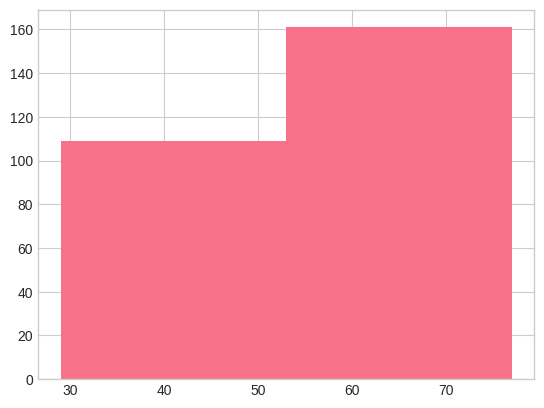

In [103]:
heart_df["Age"].hist(bins=2)

In [104]:
heart_df["Age"].median()

np.float64(55.0)

In [105]:
heart_df["Age"].min(), heart_df["Age"].max()

(np.int64(29), np.int64(77))

In [106]:
heart_df["age_col"] = heart_df["Age"].apply(lambda x: "29-55" if x < heart_df["Age"].median() else "56-77")
heart_df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease,age_col
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence,56-77
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence,56-77
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence,56-77
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence,56-77
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence,56-77


In [107]:
from sklearn.preprocessing import LabelEncoder

heart_df["Sex"] = heart_df["Sex"].astype(str)
heart_df["Age"] = heart_df["Age"].apply(lambda x: 0 if x < heart_df["Age"].median() else 1) # 0: "29-55", 1: "56-77"
heart_df["Chest pain type"] = heart_df["Chest pain type"].astype(str)
heart_df["BP"] = heart_df["BP"].astype(float)
heart_df["Cholesterol"] = heart_df["Cholesterol"].astype(float)
heart_df["FBS over 120"] = heart_df["FBS over 120"].astype(str) # heart_df["Age"].apply(lambda x: 0 if x < heart_df["Age"].median() else 1) # 0: "29-55", 1: "56-77"
heart_df["EKG results"] = heart_df["EKG results"].astype(str)
heart_df["Max HR"] = heart_df["Max HR"].astype(float)
heart_df["Exercise angina"] = heart_df["Exercise angina"].astype(str)
heart_df["ST depression"] = heart_df["ST depression"].astype(float)
heart_df["Slope of ST"] = heart_df["Slope of ST"].astype(str)
heart_df["Number of vessels fluro"] = heart_df["Number of vessels fluro"].astype(str)
heart_df["Thallium"] = heart_df["Thallium"].astype(str)
heart_df["Heart Disease"] = heart_df["Heart Disease"].apply(lambda x: 0 if x == "Absence" else 1).astype(int)
heart_df = pd.get_dummies(heart_df)
heart_df.head()

,Age,BP,Cholesterol,Max HR,ST depression,Heart Disease,Sex_0,Sex_1,Chest pain type_1,Chest pain type_2,...,Slope of ST_3,Number of vessels fluro_0,Number of vessels fluro_1,Number of vessels fluro_2,Number of vessels fluro_3,Thallium_3,Thallium_6,Thallium_7,age_col_29-55,age_col_56-77
0,1,130.0,322.0,109.0,2.4,1,False,True,False,False,...,False,False,False,False,True,True,False,False,False,True
1,1,115.0,564.0,160.0,1.6,0,True,False,False,False,...,False,True,False,False,False,False,False,True,False,True
2,1,124.0,261.0,141.0,0.3,1,False,True,False,True,...,False,True,False,False,False,False,False,True,False,True
3,1,128.0,263.0,105.0,0.2,0,False,True,False,False,...,False,False,True,False,False,False,False,True,False,True
4,1,120.0,269.0,121.0,0.2,0,True,False,False,True,...,False,False,True,False,False,True,False,False,False,True


In [108]:
phik_corr = heart_df.phik_matrix().round(2)

interval columns not set, guessing: ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression', 'Heart Disease']


<Axes: >

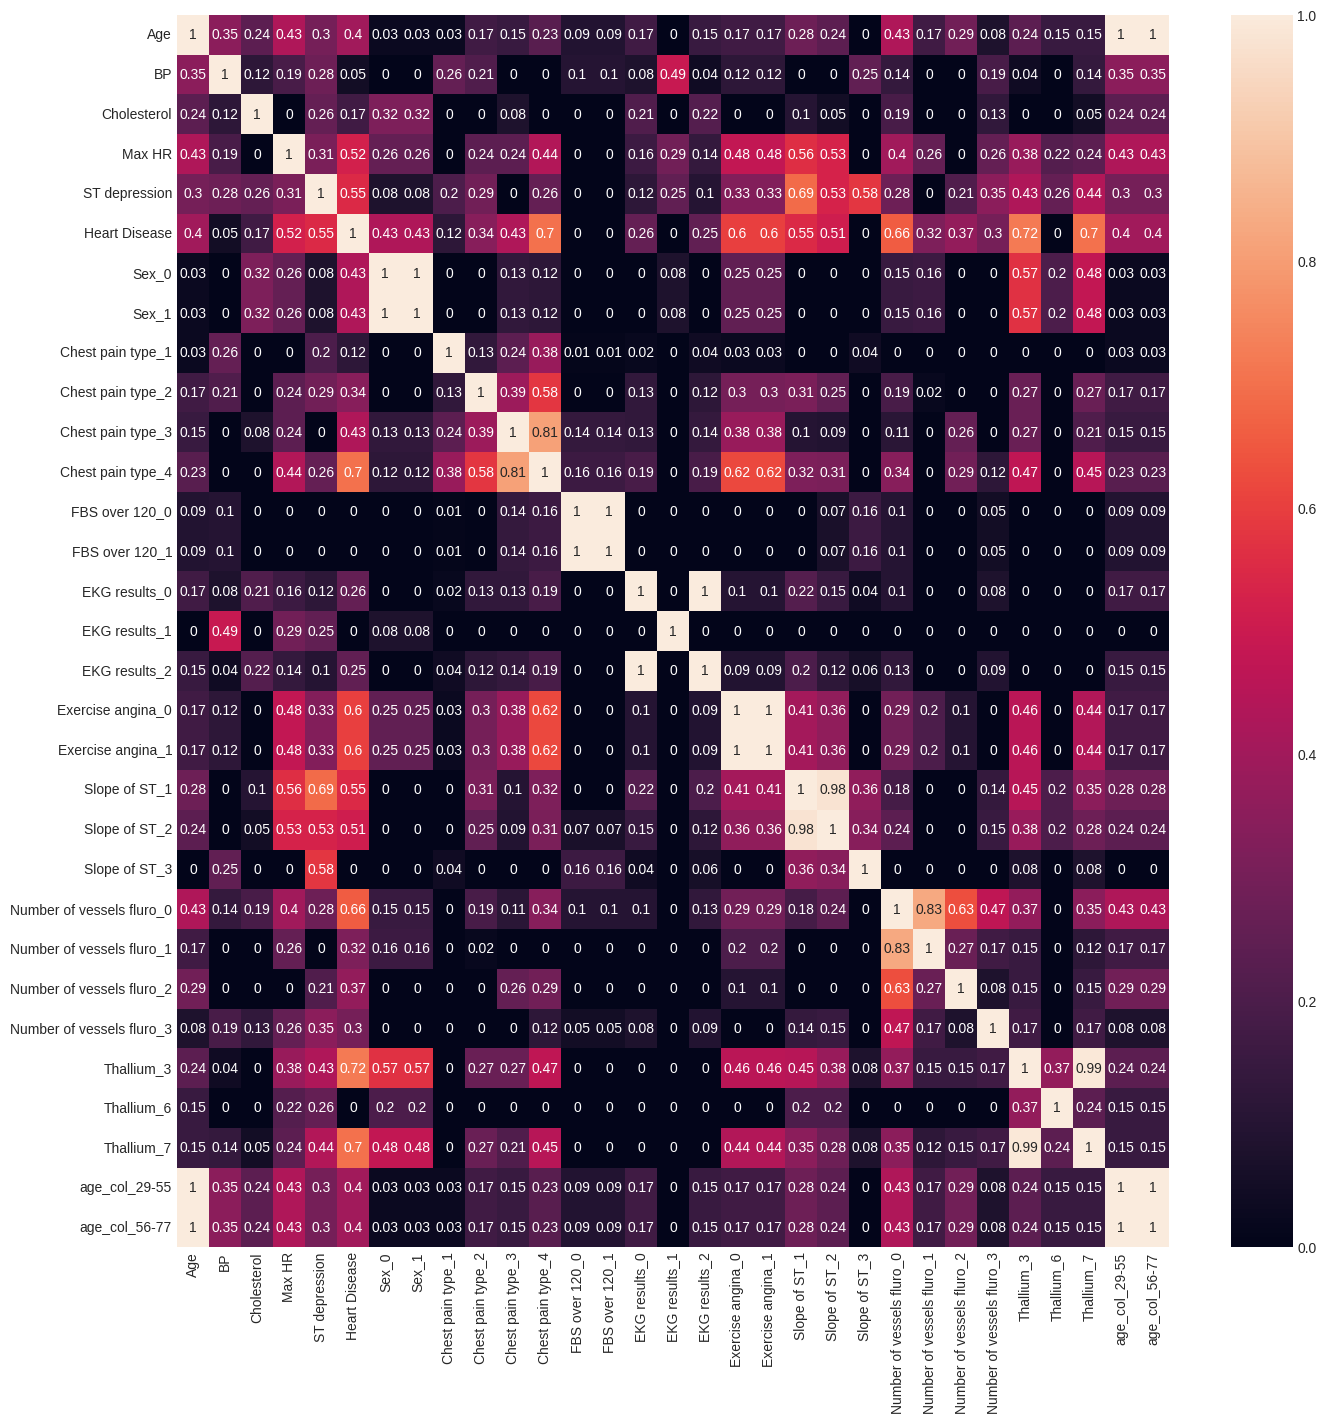

In [109]:
plt.figure(figsize=(16, 16))
sns.heatmap(phik_corr, fmt=".3g", annot=True)

In [110]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler

In [111]:
scaler = StandardScaler()
dataset = scaler.fit_transform(heart_df.drop(columns=['Heart Disease']))
X_train, X_test, y_train, y_test = train_test_split(dataset, heart_df["Heart Disease"] , test_size=0.2, random_state=42)

In [112]:
model = RandomForestClassifier(n_estimators=300, max_depth=4, min_samples_leaf=1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90        33
           1       0.89      0.76      0.82        21

    accuracy                           0.87        54
   macro avg       0.88      0.85      0.86        54
weighted avg       0.87      0.87      0.87        54



In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import shap
from sklearn.inspection import permutation_importance

# Устанавливаем стиль
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# ==================== 1. ВАЖНОСТЬ ПРИЗНАКОВ (Feature Importance) ====================

# Получаем важность признаков из модели
feature_importance = model.feature_importances_
feature_names = heart_df.drop(columns=['Heart Disease']).columns

# Создаем DataFrame для удобства
importance_df = pd.DataFrame({
    'Признак': feature_names,
    'Важность': feature_importance
}).sort_values('Важность', ascending=True)
# График 1.2: Interactive Plotly chart
fig1 = go.Figure()

fig1.add_trace(go.Bar(
    y=importance_df['Признак'],
    x=importance_df['Важность'],
    orientation='h',
    marker=dict(
        color=importance_df['Важность'],
        colorscale='Reds',
        showscale=True,
        colorbar=dict(title="Важность")
    ),
    hovertemplate='<b>%{y}</b><br>Важность: %{x:.3f}<extra></extra>',
    name='Важность признака'
))

fig1.update_layout(
    title=dict(
        text='<b>ТОП-10 самых важных признаков для диагностики болезней сердца</b>',
        font=dict(size=16, family='Arial', color='#2c3e50'),
        x=0.5
    ),
    xaxis=dict(
        title='<b>Важность признака</b>',
        gridcolor='lightgray',
        gridwidth=1
    ),
    yaxis=dict(
        title='<b>Признак</b>',
        tickfont=dict(size=11)
    ),
    plot_bgcolor='white',
    width=900,
    height=600,
    margin=dict(l=100, r=50, t=80, b=50),
    showlegend=False
)

# Добавляем аннотации с значениями
for i, (feature, importance) in enumerate(zip(importance_df['Признак'], importance_df['Важность'])):
    fig1.add_annotation(
        x=importance + 0.01,
        y=feature,
        text=f'{importance:.3f}',
        showarrow=False,
        font=dict(size=10, color='black'),
        xanchor='left'
    )

fig1.show()
fig1.write_html("feature_importance_interactive.html")
fig1.write_image("feature_importance_plotly.png", width=900, height=600)


In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import shap
from sklearn.inspection import permutation_importance

In [ ]:


# Устанавливаем стиль
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# ==================== 1. ВАЖНОСТЬ ПРИЗНАКОВ (Feature Importance) ====================

# Получаем важность признаков из модели
feature_importance = model.feature_importances_
feature_names = heart_df.drop(columns=['Heart Disease']).columns
print(feature_names)
# Создаем DataFrame для удобства
importance_df = pd.DataFrame({
    'Признак': feature_names,
    'Важность': feature_importance
}).sort_values('Важность', ascending=False)  # Сортируем по убыванию

# Берем только топ-10
top_10_df = importance_df.head(10).sort_values('Важность', ascending=True)  # Для графика сортируем по возрастанию

# График 1.2: Interactive Plotly chart ТОЛЬКО ТОП-10
fig1 = go.Figure()

fig1.add_trace(go.Bar(
    y=top_10_df['Признак'],
    x=top_10_df['Важность'],
    orientation='h',
    marker=dict(
        color=top_10_df['Важность'],
        colorscale='Reds',
        showscale=True,
        colorbar=dict(title="Важность")
    ),
    hovertemplate='<b>%{y}</b><br>Важность: %{x:.3f}<extra></extra>',
    name='Важность признака'
))

# Обновляем заголовок с информацией о модели
title_html = '''
<b>ТОП-10 самых важных признаков для диагностики болезней сердца</b>
<br><span style="font-size:14px; color:#666">
Модель: RandomForestClassifier | Accuracy: 0.85 | Macro Avg F1: 0.86
</span>
'''

fig1.update_layout(
    title=dict(
        text=title_html,
        font=dict(size=16, family='Arial', color='#2c3e50'),
        x=0.5,
        y=0.97  # Подняли заголовок выше
    ),
    xaxis=dict(
        title='<b>Важность признака</b>',
        gridcolor='lightgray',
        gridwidth=1,
        range=[0, top_10_df['Важность'].max() * 1.1]
    ),
    yaxis=dict(
        title='<b>Признак</b>',
        tickfont=dict(size=11),
        tickmode='array',
        tickvals=top_10_df['Признак'],
        ticktext=top_10_df['Признак']
    ),
    plot_bgcolor='white',
    width=900,
    height=600,
    margin=dict(l=150, r=50, t=80, b=50),  # Уменьшили верхний отступ с 100 до 80
    showlegend=False
)

# Добавляем аннотации с значениями
for i, (feature, importance) in enumerate(zip(top_10_df['Признак'], top_10_df['Важность'])):
    fig1.add_annotation(
        x=importance + 0.002,
        y=feature,
        text=f'{importance:.3f}',
        showarrow=False,
        font=dict(size=10, color='black'),
        xanchor='left',
        bgcolor='rgba(255, 255, 255, 0.7)',
        bordercolor='black',
        borderwidth=1,
        borderpad=2
    )

# Добавляем линию для разделения высоких и низких значений
mean_importance = top_10_df['Важность'].mean()
fig1.add_shape(
    type="line",
    x0=mean_importance,
    y0=-0.5,
    x1=mean_importance,
    y1=len(top_10_df) - 0.5,
    line=dict(color="gray", width=1, dash="dash"),
)

fig1.add_annotation(
    x=mean_importance,
    y=len(top_10_df) - 0.3,
    text=f"Среднее: {mean_importance:.3f}",
    showarrow=False,
    font=dict(size=10, color="gray"),
    xanchor="left",
    yanchor="bottom"
)

fig1.show()

Index(['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression', 'Sex_0', 'Sex_1',
       'Chest pain type_1', 'Chest pain type_2', 'Chest pain type_3',
       'Chest pain type_4', 'FBS over 120_0', 'FBS over 120_1',
       'EKG results_0', 'EKG results_1', 'EKG results_2', 'Exercise angina_0',
       'Exercise angina_1', 'Slope of ST_1', 'Slope of ST_2', 'Slope of ST_3',
       'Number of vessels fluro_0', 'Number of vessels fluro_1',
       'Number of vessels fluro_2', 'Number of vessels fluro_3', 'Thallium_3',
       'Thallium_6', 'Thallium_7', 'age_col_29-55', 'age_col_56-77'],
      dtype='object')


In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# ==================== УПРОЩЕННЫЙ ГРАФИК ====================

# Создаем читаемые колонки для визуализации
def get_sex(row):
    if row['Sex_1'] == 1:
        return 'Мужчины'
    elif row['Sex_0'] == 1:
        return 'Женщины'
    else:
        return 'Не указан'

heart_df['Пол'] = heart_df.apply(get_sex, axis=1)
heart_df['Диагноз'] = heart_df['Heart Disease'].apply(
    lambda x: 'Болеют' if x == 1 else 'Здоровы'
)

# ПРАВИЛЬНАЯ функция для возрастной группы (используем one-hot колонки)
def get_age_group(row):
    if 'age_col_29-55' in heart_df.columns and row['age_col_29-55'] == 1:
        return '29-55 лет'
    elif 'age_col_56-77' in heart_df.columns and row['age_col_56-77'] == 1:
        return '56-77 лет'
    else:
        # Альтернатива: группировка по возрасту напрямую
        age = row['Age']
        if pd.isna(age):
            return 'Не указан'
        elif age < 56:
            return '29-55 лет'
        else:
            return '56-77 лет'

heart_df['Возрастная_группа'] = heart_df.apply(get_age_group, axis=1)

# Проверяем, что группы создались правильно
print("Распределение по возрастным группам:")
print(heart_df['Возрастная_группа'].value_counts())
print(f"\nВсего строк: {len(heart_df)}")

# Создаем сводную таблицию
pivot_table = heart_df.pivot_table(
    index=['Возрастная_группа', 'Пол'], 
    columns='Диагноз', 
    values='Age',
    aggfunc='count',
    fill_value=0
).reset_index()

# Вычисляем проценты для каждой группы
pivot_table['Всего'] = pivot_table['Здоровы'] + pivot_table['Болеют']
pivot_table['% больных'] = (pivot_table['Болеют'] / pivot_table['Всего'] * 100).round(1)

# Сортируем
pivot_table = pivot_table.sort_values(['Возрастная_группа', 'Пол'])

# Проверяем данные
print("\nСводная таблица:")
print(pivot_table)

# Упрощенный график
fig = go.Figure()

# ЦВЕТА КАК В ОСТАЛЬНЫХ ГРАФИКАХ СЕРИИ
colors = {'Здоровы': '#4ECDC4', 'Болеют': '#FF6B6B'}  # Изменено здесь

# Создаем группированный график с Plotly
for i, diagnosis in enumerate(['Здоровы', 'Болеют']):
    fig.add_trace(go.Bar(
        x=[f"{row['Возрастная_группа']}<br>{row['Пол']}" for _, row in pivot_table.iterrows()],
        y=pivot_table[diagnosis],
        name=diagnosis,
        marker_color=colors[diagnosis],
        width=0.4,
        text=pivot_table[diagnosis],
        textposition='auto',
        hovertemplate='<b>%{x}</b><br>' + f'{diagnosis}: %{{y}} чел.<br>' + 'Всего в группе: %{customdata} чел.<extra></extra>',
        customdata=pivot_table['Всего']
    ))

# Обновляем layout
fig.update_layout(
    title=dict(
        text='<b>Распределение болезней сердца по возрасту и полу</b>',
        font=dict(size=16, family='Arial', color='#2c3e50'),
        x=0.5,
        y=0.95
    ),
    xaxis=dict(
        title='<b>Группа</b>',
        tickangle=0,
        gridcolor='rgba(128, 128, 128, 0.2)',
        title_font=dict(size=14)
    ),
    yaxis=dict(
        title='<b>Количество пациентов</b>',
        gridcolor='rgba(128, 128, 128, 0.2)',
        title_font=dict(size=14)
    ),
    barmode='group',
    plot_bgcolor='white',
    paper_bgcolor='white',
    width=800,
    height=600,
    margin=dict(l=60, r=60, t=100, b=80),
    showlegend=True,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.5,
        font=dict(size=12)
    ),
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_family="Arial"
    )
)

# Добавляем проценты больных над каждой группой
for i, row in pivot_table.iterrows():
    if row['Всего'] > 0:
        fig.add_annotation(
            x=i,
            y=row['Всего'] + max(pivot_table['Всего'])*0.02,
            text=f"{row['% больных']}%",
            showarrow=False,
            font=dict(size=11, color="#A23B72", weight="bold"),
            yanchor="bottom"
        )

# Добавляем разделительную линию между возрастными группами
# Определяем позицию линии
if len(pivot_table) >= 4:
    # Ожидаем 4 группы: 2 возрастные × 2 пола
    fig.add_shape(
        type="line",
        x0=1.5,
        y0=0,
        x1=1.5,
        y1=max(pivot_table['Всего']) * 1.15,
        line=dict(color="gray", width=1, dash="dot"),
    )
    
    fig.add_annotation(
        x=0.5,
        y=max(pivot_table['Всего']) * 1.12,
        text="29-55 лет",
        showarrow=False,
        font=dict(size=12, color="gray"),
        xanchor="center"
    )
    
    fig.add_annotation(
        x=2.5,
        y=max(pivot_table['Всего']) * 1.12,
        text="56-77 лет",
        showarrow=False,
        font=dict(size=12, color="gray"),
        xanchor="center"
    )

# Простая статистика внизу
total_patients = len(heart_df)
sick_patients = heart_df["Heart Disease"].sum() if "Heart Disease" in heart_df.columns else 0
percent_sick = (sick_patients / total_patients * 100) if total_patients > 0 else 0

stats_text = f'''
<b>Общая статистика:</b>
Всего: {total_patients} пациентов | Больных: {sick_patients} ({percent_sick:.1f}%)
'''

fig.add_annotation(
    x=0.5,
    y=-0.12,
    xref="paper",
    yref="paper",
    text=stats_text,
    showarrow=False,
    align="center",
    font=dict(size=12, color="#2c3e50"),
    bgcolor="rgba(240, 240, 240, 0.8)",
    borderpad=5,
    xanchor="center",
    yanchor="top"
)

fig.show()

# Сохраняем
fig.write_html("heart_disease_simple.html")
fig.write_image("heart_disease_simple.png", width=800, height=600)

print("\n✅ Упрощенный график создан!")
print(f"📊 На графике показано: {len(pivot_table)} комбинаций возраст-пол")
print("🎨 Цвета: #FF6B6B (болеют), #4ECDC4 (здоровы) - как во всей серии")

Распределение по возрастным группам:
Возрастная_группа
56-77 лет    138
29-55 лет    132
Name: count, dtype: int64

Всего строк: 270

Сводная таблица:
Диагноз Возрастная_группа      Пол  Болеют  Здоровы  Всего  % больных
0               29-55 лет  Женщины       2       36     38        5.3
1               29-55 лет  Мужчины      38       56     94       40.4
2               56-77 лет  Женщины      18       31     49       36.7
3               56-77 лет  Мужчины      62       27     89       69.7



✅ Упрощенный график создан!
📊 На графике показано: 4 комбинаций возраст-пол
🎨 Цвета: #FF6B6B (болеют), #4ECDC4 (здоровы) - как во всей серии


In [117]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Загружаем исходные данные
heart_df_original = pd.read_csv("/home/zorinep/big_data_magistracy/vizualize/heart.csv")

# Преобразуем для читаемости
heart_df_original["Sex_str"] = heart_df_original["Sex"].map({1: "Мужской", 0: "Женский"})
heart_df_original["Диагноз"] = heart_df_original["Heart Disease"].map({"Presence": "Есть заболевание", "Absence": "Нет заболевания"})

# Для тепловой карты нужны числовые данные
heart_df_numeric = heart_df_original.copy()

# Преобразуем категориальные в числовые для корреляции
cat_columns = ['Sex', 'Chest pain type', 'FBS over 120', 'EKG results', 
               'Exercise angina', 'Slope of ST', 'Number of vessels fluro', 'Thallium']

for col in cat_columns:
    if col in heart_df_numeric.columns:
        heart_df_numeric[col] = pd.factorize(heart_df_numeric[col])[0]

heart_df_numeric['Heart Disease_num'] = heart_df_numeric['Heart Disease'].map({'Presence': 1, 'Absence': 0})

# ==================== КАРТОЧКА 3: HEATMAP ====================
# Выбираем ключевые признаки для heatmap
selected_features = ['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 
                     'FBS over 120', 'Max HR', 'Exercise angina', 'ST depression',
                     'Number of vessels fluro', 'Thallium', 'Heart Disease_num']

# Создаем корреляционную матрицу
corr_matrix = heart_df_numeric[selected_features].phik_matrix()

# Русские названия для лучшей читаемости
russian_names = {
    'Age': 'Возраст',
    'Sex': 'Пол',
    'Chest pain type': 'Тип боли',
    'BP': 'Давление',
    'Cholesterol': 'Холестерин',
    'FBS over 120': 'Сахар >120',
    'Max HR': 'Пульс',
    'Exercise angina': 'Стенокардия',
    'ST depression': 'Депрессия ST',
    'Number of vessels fluro': 'Пораженные сосуды',
    'Thallium': 'Таллиевый тест',
    'Heart Disease_num': 'Заболевание сердца'
}

# Переименовываем
corr_matrix_renamed = corr_matrix.rename(columns=russian_names, index=russian_names)

fig3 = go.Figure(data=go.Heatmap(
    z=corr_matrix_renamed.values,
    x=corr_matrix_renamed.columns,
    y=corr_matrix_renamed.columns,
    colorscale='Blues',
    zmid=0.5,
    zmin=0,
    zmax=1,
    text=np.round(corr_matrix_renamed.values, 2),
    texttemplate='%{text}',
    textfont={"size": 16},
    hovertemplate='<b>%{y} vs %{x}</b><br>Корреляция: %{z:.3f}<extra></extra>'
))

fig3.update_layout(
    title=dict(
        text='<b>Корреляция признаков с заболеванием сердца</b><br><span style="font-size:14px; color:#666">Тепловая карта взаимосвязей между факторами риска</span>',
        font=dict(size=18, family='Arial', color='#2c3e50'),
        x=0.5,
        y=0.97
    ),
    width=1080,
    height=1080,
    margin=dict(l=120, r=80, t=120, b=100),
   xaxis=dict(
        tickangle=45,
        tickfont=dict(size=14, color='#000')  # ← крупный шрифт по X
    ),
    yaxis=dict(
        tickfont=dict(size=14, color='#000')  # ← крупный шрифт по Y
    )
)

# Добавляем аннотацию с самыми сильными корреляциями
# Находим топ-3 корреляции с заболеванием
disease_corr = corr_matrix_renamed['Заболевание сердца'].drop('Заболевание сердца')
top_corr = disease_corr.abs().nlargest(3)


fig3.show()
fig3.write_image("card3_heatmap.png", width=512, height=512)

# ==================== КАРТОЧКА 5: RADAR CHART ====================
print("Создаем Карточку 5: Radar chart сравнения профилей...")

# Выбираем признаки для радара
features_for_radar = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']
russian_labels = ['Возраст', 'Давление', 'Холестерин', 'Пульс', 'Депрессия ST']

# Средние значения
healthy_mean = heart_df_original[heart_df_original['Диагноз'] == 'Нет заболевания'][features_for_radar].mean()
disease_mean = heart_df_original[heart_df_original['Диагноз'] == 'Есть заболевание'][features_for_radar].mean()

# Нормализация
all_data = heart_df_original[features_for_radar]
data_min = all_data.min()
data_max = all_data.max()

def normalize_series(series, data_min, data_max):
    return (series - data_min) / (data_max - data_min)

healthy_norm = normalize_series(healthy_mean, data_min, data_max)
disease_norm = normalize_series(disease_mean, data_min, data_max)

# Замыкаем круг
theta_closed = russian_labels + [russian_labels[0]]
healthy_r = healthy_norm.values.tolist() + [healthy_norm.values[0]]
disease_r = disease_norm.values.tolist() + [disease_norm.values[0]]

fig5 = go.Figure()

fig5.add_trace(go.Scatterpolar(
    r=healthy_r,
    theta=theta_closed,
    fill='toself',
    fillcolor='rgba(78, 205, 196, 0.3)',
    line=dict(color='#4ECDC4', width=3),
    name='Здоровые пациенты',
    customdata=(healthy_mean.values.tolist() + [healthy_mean.values[0]]),
    hovertemplate='<b>%{theta}</b><br>Норм.: %{r:.2f}<br>Факт.: %{customdata:.1f}<extra></extra>'
))

fig5.add_trace(go.Scatterpolar(
    r=disease_r,
    theta=theta_closed,
    fill='toself',
    fillcolor='rgba(255, 107, 107, 0.3)',
    line=dict(color='#FF6B6B', width=3),
    name='Пациенты с заболеванием',
    customdata=(disease_mean.values.tolist() + [disease_mean.values[0]]),
    hovertemplate='<b>%{theta}</b><br>Норм.: %{r:.2f}<br>Факт.: %{customdata:.1f}<extra></extra>'
))

# Основной layout
fig5.update_layout(
    title=dict(
        text='<b>Профиль среднего пациента: сравнение групп</b><br><span style="font-size:14px; color:#666">Радарная диаграмма нормализованных показателей здоровья</span>',
        font=dict(size=18, family='Arial', color='#2c3e50'),
        x=0.5,
        y=0.97
    ),
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1],
            tickfont=dict(size=12),
            tickvals=[0, 0.2, 0.4, 0.6, 0.8, 1.0],
            gridcolor='lightgray',
            linecolor='gray'
        ),
        angularaxis=dict(
            gridcolor='lightgray',
            linecolor='lightgray',
            rotation=90,
            tickfont=dict(size=12)
        ),
        bgcolor='white'
    ),
    width=1080,
    height=1080,
    margin=dict(l=100, r=100, t=120, b=100),
    showlegend=True,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.5,
        font=dict(size=13)
    )
)




fig5.add_annotation(
    x=0.5,
    y=0.03,
    xref="paper",
    yref="paper",
    text="<i>Значения нормализованы по шкале min–max для сопоставления разных единиц измерения</i>",
    showarrow=False,
    align="center",
    font=dict(size=14, color="#718096", family="Segoe UI, Arial")
)

fig5.show()

interval columns not set, guessing: ['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'Max HR', 'Exercise angina', 'ST depression', 'Number of vessels fluro', 'Thallium', 'Heart Disease_num']


Создаем Карточку 5: Radar chart сравнения профилей...


In [118]:
heart_df.columns

Index(['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression', 'Heart Disease',
       'Sex_0', 'Sex_1', 'Chest pain type_1', 'Chest pain type_2',
       'Chest pain type_3', 'Chest pain type_4', 'FBS over 120_0',
       'FBS over 120_1', 'EKG results_0', 'EKG results_1', 'EKG results_2',
       'Exercise angina_0', 'Exercise angina_1', 'Slope of ST_1',
       'Slope of ST_2', 'Slope of ST_3', 'Number of vessels fluro_0',
       'Number of vessels fluro_1', 'Number of vessels fluro_2',
       'Number of vessels fluro_3', 'Thallium_3', 'Thallium_6', 'Thallium_7',
       'age_col_29-55', 'age_col_56-77', 'Пол', 'Диагноз',
       'Возрастная_группа'],
      dtype='object')

In [119]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Загружаем исходные данные
heart_df_original = pd.read_csv("/home/zorinep/big_data_magistracy/vizualize/heart.csv")

# Преобразуем для читаемости
heart_df_original["Sex_str"] = heart_df_original["Sex"].map({1: "Мужской", 0: "Женский"})
heart_df_original["Диагноз"] = heart_df_original["Heart Disease"].map({"Presence": "Есть заболевание", "Absence": "Нет заболевания"})

# ==================== КАРТОЧКА 6: SCATTERPLOT MATRIX ====================
print("Создаем Карточку 6: Scatterplot Matrix...")

# Выбираем 4 ключевых числовых признака для матрицы
selected_features = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']
russian_names = {
    'Age': 'Возраст (лет)',
    'BP': 'Давление (мм рт.ст.)',
    'Cholesterol': 'Холестерин (мг/дл)',
    'Max HR': 'Максимальный пульс',
    'ST depression': 'Депрессия ST'
}

# Создаем матрицу рассеяния
fig6 = px.scatter_matrix(
    heart_df_original,
    dimensions=selected_features,
    color="Диагноз",
    color_discrete_map={
        "Есть заболевание": "#FF6B6B",
        "Нет заболевания": "#4ECDC4"
    },
    title="<b>Матрица взаимосвязей ключевых показателей</b><br><span style='font-size:14px; color:#666'>Парные сравнения признаков с выделением групп здоровья</span>",
    labels=russian_names,
    opacity=0.7,
    symbol="Диагноз"
)

# Обновляем layout для квадратного формата
fig6.update_layout(
    title=dict(
        font=dict(size=18, family='Arial', color='#2c3e50'),
        x=0.5,
        y=0.97
    ),
    width=1080,
    height=1080,
    margin=dict(l=60, r=60, t=120, b=60),
    showlegend=True,
    legend=dict(
        title="<b>Диагноз:</b>",
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.5,
        font=dict(size=12)
    )
)

# Улучшаем отображение диагональных графиков (гистограммы)
for i in range(len(selected_features)):
    # Получаем данные для гистограммы
    fig6.update_traces(
        diagonal_visible=True,
        showupperhalf=False,  # Показываем только нижний треугольник для читаемости
        marker=dict(
            size=6,
            line=dict(width=0.5, color='white'),
            opacity=0.7
        ),
        selector=dict(type='splom', dimensions=selected_features)
    )

# Добавляем корреляции в каждую ячейку
correlations = heart_df_original[selected_features].corr()

# Функция для добавления текста корреляции
for i in range(len(selected_features)):
    for j in range(len(selected_features)):
        if i > j:  # Только нижний треугольник
            corr_value = correlations.iloc[i, j]
            # Позиционируем текст в центре каждого subplot
            x_pos = (j + 0.5) / len(selected_features)
            y_pos = 1 - (i + 0.5) / len(selected_features)
            
            fig6.add_annotation(
                x=x_pos,
                y=y_pos,
                xref="paper",
                yref="paper",
                text=f"r = {corr_value:.2f}",
                showarrow=False,
                font=dict(size=10, color="black", weight="bold"),
                bgcolor="rgba(255, 255, 255, 0.8)",
                bordercolor="black",
                borderwidth=1,
                borderpad=3,
                opacity=0.9
            )

# Добавляем инсайты в правый верхний угол
insights_text = '''
<b>📈 Ключевые наблюдения:</b><br>
• <b>Возраст-Холестерин:</b> Положительная корреляция<br>
• <b>Давление-Холестерин:</b> Слабая связь<br>
• <b>Пульс-Депрессия ST:</b> Отрицательная связь<br>
• <b>Кластеры:</b> Четкое разделение групп<br>
• <b>Выбросы:</b> Есть аномальные значения
'''

fig6.add_annotation(
    x=0.98, y=0.98,
    xref="paper", yref="paper",
    text=insights_text,
    showarrow=False,
    align="right",
    font=dict(size=11, color="#2c3e50"),
    bgcolor="rgba(255, 255, 255, 0.9)",
    bordercolor="#2c3e50",
    borderwidth=1,
    borderpad=10
)

fig6.show()
fig6.write_image("card6_scatter_matrix.png", width=1080, height=1080)

# ==================== БОНУС: ВАРИАНТ 7 - ПАРАЛЛЕЛЬНЫЕ КООРДИНАТЫ ====================
print("\nБонус: Создаем Карточку 7: Parallel Coordinates...")

# Создаем датафрейм с нормализованными значениями для параллельных координат
features_for_parallel = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression', 'Number of vessels fluro']

# Нормализуем значения
df_normalized = heart_df_original.copy()
for feature in features_for_parallel:
    if feature in df_normalized.columns:
        min_val = df_normalized[feature].min()
        max_val = df_normalized[feature].max()
        df_normalized[feature] = (df_normalized[feature] - min_val) / (max_val - min_val)

# Создаем график параллельных координат
fig7 = go.Figure(data=
    go.Parcoords(
        line=dict(
            color=df_normalized['Диагноз'].map({"Есть заболевание": 1, "Нет заболевания": 0}),
            colorscale=[[0, '#4ECDC4'], [1, '#FF6B6B']],
            showscale=True,
            cmin=0,
            cmax=1,
            colorbar=dict(
                title="Диагноз",
                tickvals=[0, 1],
                ticktext=["Здоров", "Болеет"],
                x=1.05
            )
        ),
        dimensions=[dict(
            label=russian_names.get(feature, feature),
            values=df_normalized[feature],
            range=[0, 1]
        ) for feature in features_for_parallel]
    )
)

fig7.update_layout(
    title=dict(
        text='<b>Параллельные координаты: многомерная визуализация пациентов</b><br><span style="font-size:14px; color:#666">Каждая линия - пациент, цвета показывают диагноз</span>',
        font=dict(size=18, family='Arial', color='#2c3e50'),
        x=0.5,
        y=0.97
    ),
    width=1080,
    height=1080,
    margin=dict(l=80, r=120, t=120, b=80)
)

# Добавляем объяснение
explanation_text = '''
<b>Как читать этот график:</b><br>
• Каждая линия = 1 пациент<br>
• Вертикальные оси = признаки<br>
• Цвет линии = диагноз<br>
• Пересечения = значения признаков<br>
• Паттерны = схожие профили пациентов
'''

fig7.add_annotation(
    x=0.02, y=0.98,
    xref="paper", yref="paper",
    text=explanation_text,
    showarrow=False,
    align="left",
    font=dict(size=11, color="#2c3e50"),
    bgcolor="rgba(255, 255, 255, 0.9)",
    bordercolor="#2c3e50",
    borderwidth=1,
    borderpad=10
)

fig7.show()
fig7.write_image("card7_parallel_coords.png", width=1080, height=1080)

print("\n" + "="*60)
print("✅ ДОПОЛНИТЕЛЬНЫЕ КАРТОЧКИ СОЗДАНЫ!")
print("="*60)
print("\n📊 Новые файлы (1080x1080 px):")
print("1. card6_scatter_matrix.png - Матрица рассеяния")
print("2. card7_parallel_coords.png - Параллельные координаты (бонус)")
print("\n🎯 Теперь у вас есть 7 разных видов графиков:")
print("   1. Bar Chart (горизонтальный)")
print("   2. Grouped Bar Chart")
print("   3. Heatmap")
print("   4. Donut Chart")
print("   5. Radar Chart")
print("   6. Scatterplot Matrix")
print("   7. Parallel Coordinates (бонус)")
print("\n💡 Все карточки можно использовать как инфографику для соцсетей, презентаций или отчетов!")

Создаем Карточку 6: Scatterplot Matrix...



Бонус: Создаем Карточку 7: Parallel Coordinates...



✅ ДОПОЛНИТЕЛЬНЫЕ КАРТОЧКИ СОЗДАНЫ!

📊 Новые файлы (1080x1080 px):
1. card6_scatter_matrix.png - Матрица рассеяния
2. card7_parallel_coords.png - Параллельные координаты (бонус)

🎯 Теперь у вас есть 7 разных видов графиков:
   1. Bar Chart (горизонтальный)
   2. Grouped Bar Chart
   3. Heatmap
   4. Donut Chart
   5. Radar Chart
   6. Scatterplot Matrix
   7. Parallel Coordinates (бонус)

💡 Все карточки можно использовать как инфографику для соцсетей, презентаций или отчетов!


In [120]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# Загружаем исходные данные
heart_df_original = pd.read_csv("/home/zorinep/big_data_magistracy/vizualize/heart.csv")

# Преобразуем для читаемости
heart_df_original["Пол"] = heart_df_original["Sex"].map({1: "Мужской", 0: "Женский"})
heart_df_original["Диагноз"] = heart_df_original["Heart Disease"].map({"Presence": "Есть заболевание", "Absence": "Нет заболевания"})

# ==================== КАРТОЧКА 6: VIOLIN PLOT ====================
print("Создаем Карточку 6: Violin plot...")

# Создаем subplot с 3 violin plots
fig6 = make_subplots(
    rows=1, cols=3,
    subplot_titles=['<b>Холестерин</b>', '<b>Давление</b>', '<b>Пульс</b>'],
    horizontal_spacing=0.08,
    shared_yaxes=False
)

# Показатели для анализа
indicators = ['Cholesterol', 'BP', 'Max HR']
titles_short = ['Холестерин<br>(мг/дл)', 'Давление<br>(мм рт.ст.)', 'Пульс<br>(уд/мин)']

# Цвета для групп
colors = {
    ('Мужской', 'Нет заболевания'): 'rgba(78, 205, 196, 0.6)',      # Бирюзовый светлый
    ('Женский', 'Нет заболевания'): 'rgba(78, 205, 196, 0.3)',      # Бирюзовый светлее
    ('Мужской', 'Есть заболевание'): 'rgba(255, 107, 107, 0.6)',    # Красный светлый
    ('Женский', 'Есть заболевание'): 'rgba(255, 107, 107, 0.3)'     # Красный светлее
}

line_colors = {
    ('Мужской', 'Нет заболевания'): '#4ECDC4',
    ('Женский', 'Нет заболевания'): '#4ECDC4',
    ('Мужской', 'Есть заболевание'): '#FF6B6B',
    ('Женский', 'Есть заболевание'): '#FF6B6B'
}

# Для каждой метрики создаем violin plot
for col_idx, (indicator, title) in enumerate(zip(indicators, titles_short), 1):
    
    # Создаем группы: Мужчины/Женщины × Здоровые/Больные
    groups = [
        ('Мужской', 'Нет заболевания'),
        ('Женский', 'Нет заболевания'),
        ('Мужской', 'Есть заболевание'),
        ('Женский', 'Есть заболевание')
    ]
    
    for group in groups:
        sex, diagnosis = group
        
        # Фильтруем данные
        subset = heart_df_original[
            (heart_df_original['Пол'] == sex) & 
            (heart_df_original['Диагноз'] == diagnosis)
        ]
        
        if len(subset) > 0:
            # Для мужчин делаем справа, для женщин слева
            side = 'positive' if sex == 'Мужской' else 'negative'
            
            fig6.add_trace(go.Violin(
                y=subset[indicator],
                x=[title] * len(subset),
                name=f"{sex} - {diagnosis}",
                side=side,
                line_color=line_colors[group],
                fillcolor=colors[group],
                opacity=0.8,
                meanline_visible=True,
                box_visible=True,
                points=False,  # Не показываем точки для чистоты
                scalemode='width',
                width=0.8,
                hoverinfo='y',
                legendgroup=str(group),
                showlegend=(col_idx == 1)  # Показывать легенду только для первого графика
            ),
            row=1, col=col_idx)

# Настраиваем layout
fig6.update_layout(
    title=dict(
        text='<b>Распределение показателей по полу и диагнозу</b><br><span style="font-size:14px; color:#666">Скрипичные диаграммы показывают плотность распределения и медианные значения</span>',
        font=dict(size=18, family='Arial', color='#2c3e50'),
        x=0.5,
        y=0.97
    ),
    width=1080,
    height=1080,
    margin=dict(l=60, r=60, t=120, b=100),
    plot_bgcolor='white',
    showlegend=True,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.5,
        font=dict(size=11),
        title=dict(text="<b>Группы пациентов:</b>")
    ),
    violingap=0.1,
    violingroupgap=0.1,
    violinmode='overlay'
)

# Настраиваем оси
for i in range(1, 4):
    fig6.update_xaxes(
        tickangle=0,
        tickfont=dict(size=11),
        showgrid=False,
        row=1, col=i
    )
    fig6.update_yaxes(
        gridcolor='lightgray',
        gridwidth=1,
        title_text=indicators[i-1],
        row=1, col=i
    )

# Добавляем аннотации с выводами
insights_text = '''
<b>🔍 Ключевые наблюдения:</b><br>
• <b>Холестерин:</b> У мужчин с болезнью<br>   более высокие и широкие распределения<br>
• <b>Давление:</b> Меньше различий между группами<br>   по сравнению с другими показателями<br>
• <b>Пульс:</b> У женщин с болезнью пульс<br>   в среднем ниже, чем у здоровых
'''

fig6.add_annotation(
    x=0.02, y=0.98,
    xref="paper", yref="paper",
    text=insights_text,
    showarrow=False,
    align="left",
    font=dict(size=11, color="#2c3e50"),
    bgcolor="rgba(255, 255, 255, 0.9)",
    bordercolor="#2c3e50",
    borderwidth=1,
    borderpad=10
)

# Добавляем объяснение графика
explanation_text = '''
<b>📊 Как читать график:</b><br>
• <b>Ширина</b> = частота значений<br>
• <b>Толстая линия</b> = медиана<br>
• <b>Коробка</b> = межквартильный размах<br>
• <b>Правая сторона</b> = мужчины<br>
• <b>Левая сторона</b> = женщины
'''

fig6.add_annotation(
    x=0.98, y=0.98,
    xref="paper", yref="paper",
    text=explanation_text,
    showarrow=False,
    align="right",
    font=dict(size=11, color="#2c3e50"),
    bgcolor="rgba(240, 240, 240, 0.9)",
    bordercolor="#2c3e50",
    borderwidth=1,
    borderpad=10
)

fig6.show()

Создаем Карточку 6: Violin plot...


In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Загружаем исходные данные
heart_df_original = pd.read_csv("/home/zorinep/big_data_magistracy/vizualize/heart.csv")

# Преобразуем для читаемости
heart_df_original["Пол"] = heart_df_original["Sex"].map({1: "Мужской", 0: "Женский"})
heart_df_original["Диагноз"] = heart_df_original["Heart Disease"].map({"Presence": "Есть заболевание", "Absence": "Нет заболевания"})

# ==================== КАРТОЧКА 6: VIOLIN PLOT ====================
print("Создаем Карточку 6: Violin plot...")

# Создаем subplot с 3 violin plots
fig6 = make_subplots(
    rows=1, cols=3,
    subplot_titles=['<b>Холестерин</b>', '<b>Давление</b>', '<b>Пульс</b>'],
    horizontal_spacing=0.08,
    shared_yaxes=False
)

# Показатели для анализа
indicators = ['Cholesterol', 'BP', 'Max HR']
titles_short = ['Холестерин<br>(мг/дл)', 'Давление<br>(мм рт.ст.)', 'Пульс<br>(уд/мин)']

# 4 РАЗНЫХ ЦВЕТА для каждой группы
colors = {
    ('Мужской', 'Нет заболевания'): 'rgba(78, 205, 196, 0.7)',      # Яркий бирюзовый
    ('Женский', 'Нет заболевания'): 'rgba(52, 152, 219, 0.7)',      # Синий
    ('Мужской', 'Есть заболевание'): 'rgba(255, 107, 107, 0.7)',    # Красный
    ('Женский', 'Есть заболевание'): 'rgba(155, 89, 182, 0.7)'      # Фиолетовый
}

line_colors = {
    ('Мужской', 'Нет заболевания'): '#4ECDC4',
    ('Женский', 'Нет заболевания'): '#3498db',
    ('Мужской', 'Есть заболевание'): '#FF6B6B',
    ('Женский', 'Есть заболевание'): '#9b59b6'
}

# Для каждой метрики создаем violin plot
for col_idx, (indicator, title) in enumerate(zip(indicators, titles_short), 1):
    
    # Создаем группы: Мужчины/Женщины × Здоровые/Больные
    groups = [
        ('Мужской', 'Нет заболевания'),
        ('Женский', 'Нет заболевания'),
        ('Мужской', 'Есть заболевание'),
        ('Женский', 'Есть заболевание')
    ]
    
    for group in groups:
        sex, diagnosis = group
        
        # Фильтруем данные
        subset = heart_df_original[
            (heart_df_original['Пол'] == sex) & 
            (heart_df_original['Диагноз'] == diagnosis)
        ]
        
        if len(subset) > 0:
            # Для мужчин делаем справа, для женщин слева
            side = 'positive' if sex == 'Мужской' else 'negative'
            
            fig6.add_trace(go.Violin(
                y=subset[indicator],
                x=[title] * len(subset),
                name=f"{sex} - {diagnosis}",
                side=side,
                line_color=line_colors[group],
                fillcolor=colors[group],
                opacity=0.8,
                meanline_visible=True,
                box_visible=True,
                points=False,
                scalemode='width',
                width=0.8,
                hoverinfo='y',
                hoverlabel=dict(
                    bgcolor=line_colors[group],
                    font_color='white'
                ),
                legendgroup=str(group),
                showlegend=(col_idx == 1)  # Показывать легенду только для первого графика
            ),
            row=1, col=col_idx)

# Настраиваем layout
fig6.update_layout(
    title=dict(
        text='<b>Распределение показателей по полу и диагнозу</b><br><span style="font-size:14px; color:#666">Скрипичные диаграммы показывают плотность распределения и медианные значения</span>',
        font=dict(size=18, family='Arial', color='#2c3e50'),
        x=0.5,
        y=0.97
    ),
    width=1080,
    height=1080,
    margin=dict(l=60, r=60, t=120, b=100),
    plot_bgcolor='white',
    showlegend=True,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.5,
        font=dict(size=11),
        title=dict(text="<b>Группы пациентов:</b>")
    ),
    violingap=0.1,
    violingroupgap=0.1,
    violinmode='overlay'
)

# Настраиваем оси
for i in range(1, 4):
    fig6.update_xaxes(
        tickangle=0,
        tickfont=dict(size=11),
        showgrid=False,
        row=1, col=i
    )
    fig6.update_yaxes(
        gridcolor='lightgray',
        gridwidth=1,
        title_text=indicators[i-1],
        row=1, col=i
    )

# Добавляем цветовую легенду в виде мини-таблицы
color_legend_text = '''
<table style="width:100%; border-collapse: collapse; margin-top: 10px;">
<tr>
    <td style="background-color: #4ECDC4; width: 15px; height: 15px; border-radius: 3px;"></td>
    <td style="padding-left: 5px;">Мужчины здоровые</td>
    <td style="background-color: #3498db; width: 15px; height: 15px; border-radius: 3px;"></td>
    <td style="padding-left: 5px;">Женщины здоровые</td>
</tr>
<tr>
    <td style="background-color: #FF6B6B; width: 15px; height: 15px; border-radius: 3px;"></td>
    <td style="padding-left: 5px;">Мужчины больные</td>
    <td style="background-color: #9b59b6; width: 15px; height: 15px; border-radius: 3px;"></td>
    <td style="padding-left: 5px;">Женщины больные</td>
</tr>
</table>
'''

fig6.add_annotation(
    x=0.5, y=-0.08,
    xref="paper", yref="paper",
    text=color_legend_text,
    showarrow=False,
    align="center",
    font=dict(size=10, color="#2c3e50"),
    bgcolor="rgba(240, 240, 240, 0.8)",
    borderwidth=0,
    borderpad=10
)

# Добавляем аннотации с выводами
insights_text = '''
<b>🔍 Ключевые наблюдения:</b><br>
• <b>Холестерин:</b> У мужчин с болезнью<br>   более высокие и широкие распределения<br>
• <b>Давление:</b> Меньше различий между группами<br>   по сравнению с другими показателями<br>
• <b>Пульс:</b> У женщин с болезнью пульс<br>   в среднем ниже, чем у здоровых
'''

fig6.add_annotation(
    x=0.02, y=0.98,
    xref="paper", yref="paper",
    text=insights_text,
    showarrow=False,
    align="left",
    font=dict(size=11, color="#2c3e50"),
    bgcolor="rgba(255, 255, 255, 0.9)",
    bordercolor="#2c3e50",
    borderwidth=1,
    borderpad=10
)

# Добавляем объяснение графика
explanation_text = '''
<b>📊 Как читать график:</b><br>
• <b>Ширина</b> = частота значений<br>
• <b>Толстая линия</b> = медиана<br>
• <b>Коробка</b> = межквартильный размах<br>
• <b>Правая сторона</b> = мужчины<br>
• <b>Левая сторона</b> = женщины
'''

fig6.add_annotation(
    x=0.98, y=0.98,
    xref="paper", yref="paper",
    text=explanation_text,
    showarrow=False,
    align="right",
    font=dict(size=11, color="#2c3e50"),
    bgcolor="rgba(240, 240, 240, 0.9)",
    bordercolor="#2c3e50",
    borderwidth=1,
    borderpad=10
)

fig6.show()
fig6.write_image("card6_violin_4colors.png", width=1080, height=1080)

print("✅ Карточка 6 создана с 4 различными цветами!")

Создаем Карточку 6: Violin plot...


✅ Карточка 6 создана с 4 различными цветами!
